In [17]:
from ift6758.data.nhl_data_parser import NHLDataParser
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parser = NHLDataParser()

In [4]:
df = parser.get_shot_and_goal_pbp_df_for_season(2023)

In [6]:
df.head(10)

,gameId,timeRemaining,periodNumber,timeInPeriod,eventType,shotType,xCoord,yCoord,shootingTeam,shootingPlayer,goalieInNet
0,2023020001,18:59,1,01:01,0,wrist,59,-26,Lightning,Darren Raddysh,Juuse Saros
1,2023020001,18:50,1,01:10,0,tip-in,81,8,Lightning,Brayden Point,Juuse Saros
2,2023020001,18:13,1,01:47,0,snap,55,30,Lightning,Tanner Jeannot,Juuse Saros
3,2023020001,17:03,1,02:57,0,wrist,58,-30,Lightning,Michael Eyssimont,Juuse Saros
4,2023020001,12:45,1,07:15,0,snap,-75,-15,Predators,Yakov Trenin,Jonas Johansson
5,2023020001,11:34,1,08:26,0,snap,-47,-25,Predators,Kiefer Sherwood,Jonas Johansson
6,2023020001,10:36,1,09:24,0,wrist,34,31,Lightning,Victor Hedman,Juuse Saros
7,2023020001,10:12,1,09:48,1,slap,50,-16,Lightning,Nikita Kucherov,Juuse Saros
8,2023020001,09:45,1,10:15,0,snap,34,-31,Lightning,Erik Cernak,Juuse Saros
9,2023020001,09:23,1,10:37,0,wrist,63,-22,Lightning,Luke Glendening,Juuse Saros


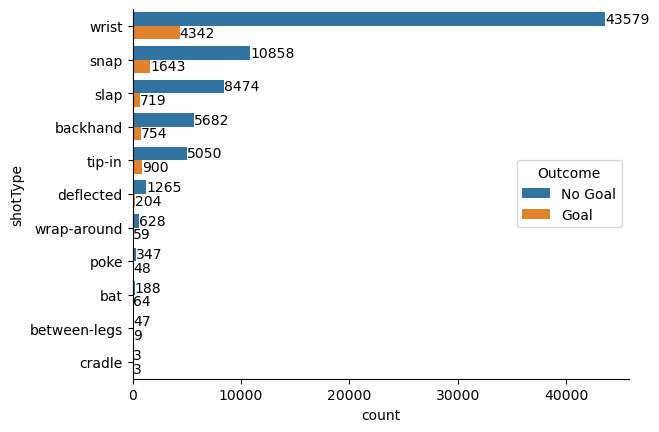

In [50]:
shot_counts = sns.countplot(y='shotType',data=df,hue='eventType',order=df['shotType'].value_counts().index)
plt.legend(title='Outcome', loc='center right', labels=['No Goal', 'Goal'])
for container in shot_counts.containers:
    shot_counts.bar_label(container)
shot_counts.spines[['right', 'top']].set_visible(False)